In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("student_data.csv")

In [3]:
display(df.head())

,StudentID,Gender,Age,Country,Lessons Completed,Quiz Score,Time Per Week,Result
0,S001,Male,20.0,India,25,78.5,10,Pass
1,S002,Female,22.0,USA,30,82.0,12,Pass
2,S003,Male,19.0,Sri Lanka,18,45.0,8,Fail
3,S004,Female,21.0,India,28,88.0,9,Pass
4,S005,Female,18.0,USA,15,35.0,5,Fail


In [4]:
print(list(df.columns))

['StudentID', 'Gender', 'Age', 'Country', 'Lessons Completed', 'Quiz Score', 'Time Per Week', 'Result']


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          20 non-null     object 
 1   Gender             20 non-null     object 
 2   Age                18 non-null     float64
 3   Country            20 non-null     object 
 4   Lessons Completed  20 non-null     int64  
 5   Quiz Score         18 non-null     float64
 6   Time Per Week      20 non-null     int64  
 7   Result             20 non-null     object 
dtypes: float64(2), int64(2), object(4)
memory usage: 1.4+ KB


In [7]:
df.describe()

,Age,Lessons Completed,Quiz Score,Time Per Week
count,18.000000,20.000000,18.000000,20.000000
mean,21.722222,22.350000,62.194444,8.550000
std,2.136670,7.596918,25.133256,3.316228
min,18.000000,10.000000,20.000000,3.000000
25%,20.000000,17.250000,41.250000,6.000000
50%,21.500000,23.500000,71.000000,8.500000
75%,23.000000,28.250000,83.500000,10.250000
max,26.000000,35.000000,95.000000,15.000000


In [8]:
missing_values = df.isnull().sum()
print(missing_values)

StudentID            0
Gender               0
Age                  2
Country              0
Lessons Completed    0
Quiz Score           2
Time Per Week        0
Result               0
dtype: int64


In [9]:
total_missing = df.isnull().sum().sum()
print("Total missing values in dataset:", total_missing)


Total missing values in dataset: 4


In [10]:
rows_with_missing = df[df.isnull().any(axis=1)]
print(rows_with_missing)


   StudentID  Gender   Age    Country  Lessons Completed  Quiz Score  \
5       S006    Male   NaN  Sri Lanka                 10        25.0   
7       S008  Female  23.0        USA                 20         NaN   
13      S014  Female   NaN      India                 26        80.0   
14      S015    Male  23.0        USA                 22         NaN   

    Time Per Week Result  
5               4   Fail  
7              11   Pass  
13              9   Pass  
14              7   Pass  


In [18]:
df.fillna(df['Age'].mean(), inplace=True)
df.fillna(df['Quiz Score'].mean(), inplace=True)

In [19]:
df["Gender"] = df["Gender"].map({"Male": 1,"Female" : 0})
df["Result"] = df["Result"].map({"Pass":1, "Fail":0})

In [33]:
df["Engagement Level"] = df["Lessons Completed"] / (df["Time Per Week"] + 0.0001)

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler = MinMaxScaler()
scale_cols = ["Age","Lessons Completed","Quiz Score","Time Per Week","Engagement Level"]
df[scale_cols] = scaler.fit_transform(df[scale_cols])
df.head()

,StudentID,Gender,Age,Country,Lessons Completed,Quiz Score,Time Per Week,Result,Engagment Level,Engagement Level
0,S001,1,0.250,India,0.60,0.780000,0.583333,1,2.499975,0.388892
1,S002,0,0.500,USA,0.80,0.826667,0.750000,1,2.499979,0.388894
2,S003,1,0.125,Sri Lanka,0.32,0.333333,0.416667,0,2.249972,0.246295
3,S004,0,0.375,India,0.72,0.906667,0.500000,1,3.111077,0.737453
4,S005,0,0.000,USA,0.20,0.200000,0.166667,0,2.999940,0.674063


In [40]:
X = df.drop(columns=["StudentID","Result","Country"])
y = df["Result"]

In [43]:
from sklearn.model_selection import train_test_split

In [48]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
model =  RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [51]:
from  sklearn.metrics import classification_report,accuracy_score

print("Accuracy: ",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

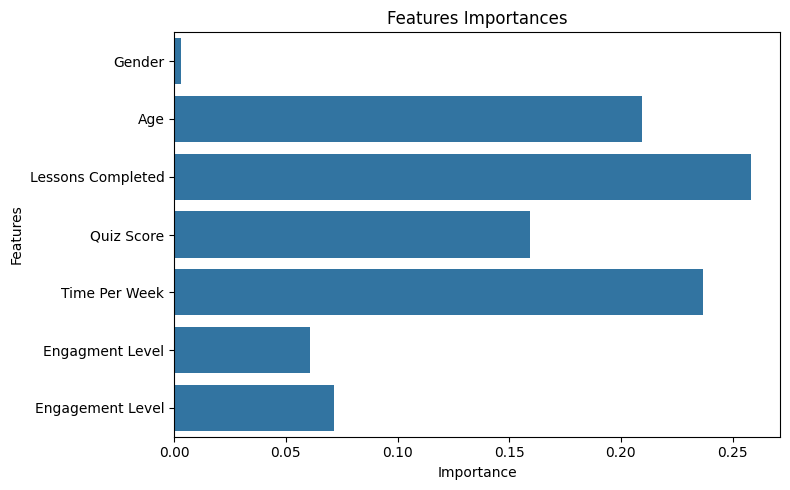

In [59]:
importances = model.feature_importances_
features = X.columns


plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=features)
plt.title("Features Importances")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()